## Big Data: Pyspark on AWS

* Apache Spark is an open source cluster computing framework for real-time data processing.  
#### Main Feature
* The main feature of Apache Spark is its in-memory cluster computing that increases the processing speed of an application. 
* Spark provides an interface for programming entire clusters with implicit data parallelism and fault tolerance. It is designed to cover a wide range of workloads such as batch applications, iterative algorithms, interactive queries, and streaming.

https://www.edureka.co/blog/spark-architecture/

#### RDD:
RDDs are the building blocks of any Spark application:
* __Resilient__: Fault tolerant and is capable of rebuilding data on failure (even if one executor node fails, another will still process the data.)
* __Distributed__: Distributed data among the multiple nodes in a cluster
* __Dataset__: Collection of partitioned data with values

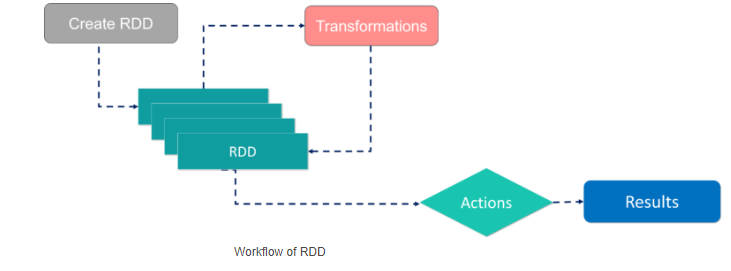

In [19]:
from IPython.display import Image
#This is not required for Choropleth map, but for insert image into this notebook.
Image(filename='Image/workflowRDD.png')

* __2 ways to create RDDs:__
    - Parallelizing an existing collection in your driver program
    - Referencing a dataset in an external storage system, such as a shared file system, HDFS, HBase, etc.

#### Basic architecture of Spark:

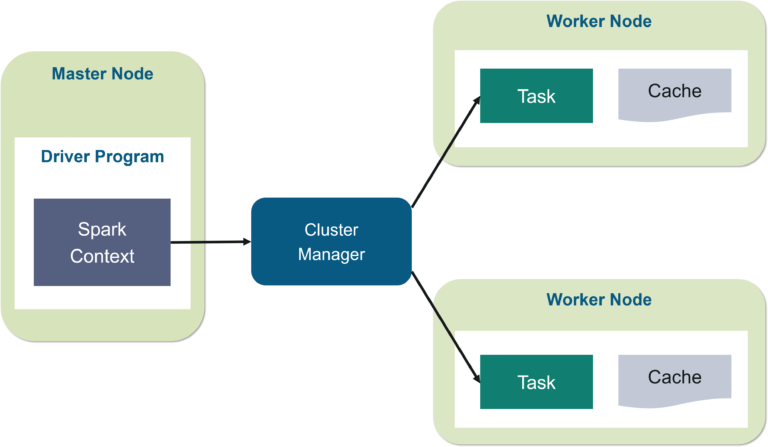

In [20]:
Image(filename='Image/sparkarc.png')

* __cluster manager:__ Manage various jobs. 
* __Driver program & Spark context__: takes care of the job execution within the cluster. Spark Context takes the job, breaks the job in tasks and distribute them to the worker nodes.   
The driver implicitly converts user code that contains transformations and actions into a logically directed acyclic graph called DAG. 
Anytime an RDD is created in Spark context, it can be distributed across various nodes and can be cached over the worker node.
* __Worker nodes:__ the slave nodes whose job is to basically execute the tasks. These tasks are then executed on the partitioned RDDs in the worker node and hence returns back the result to the Spark Context.

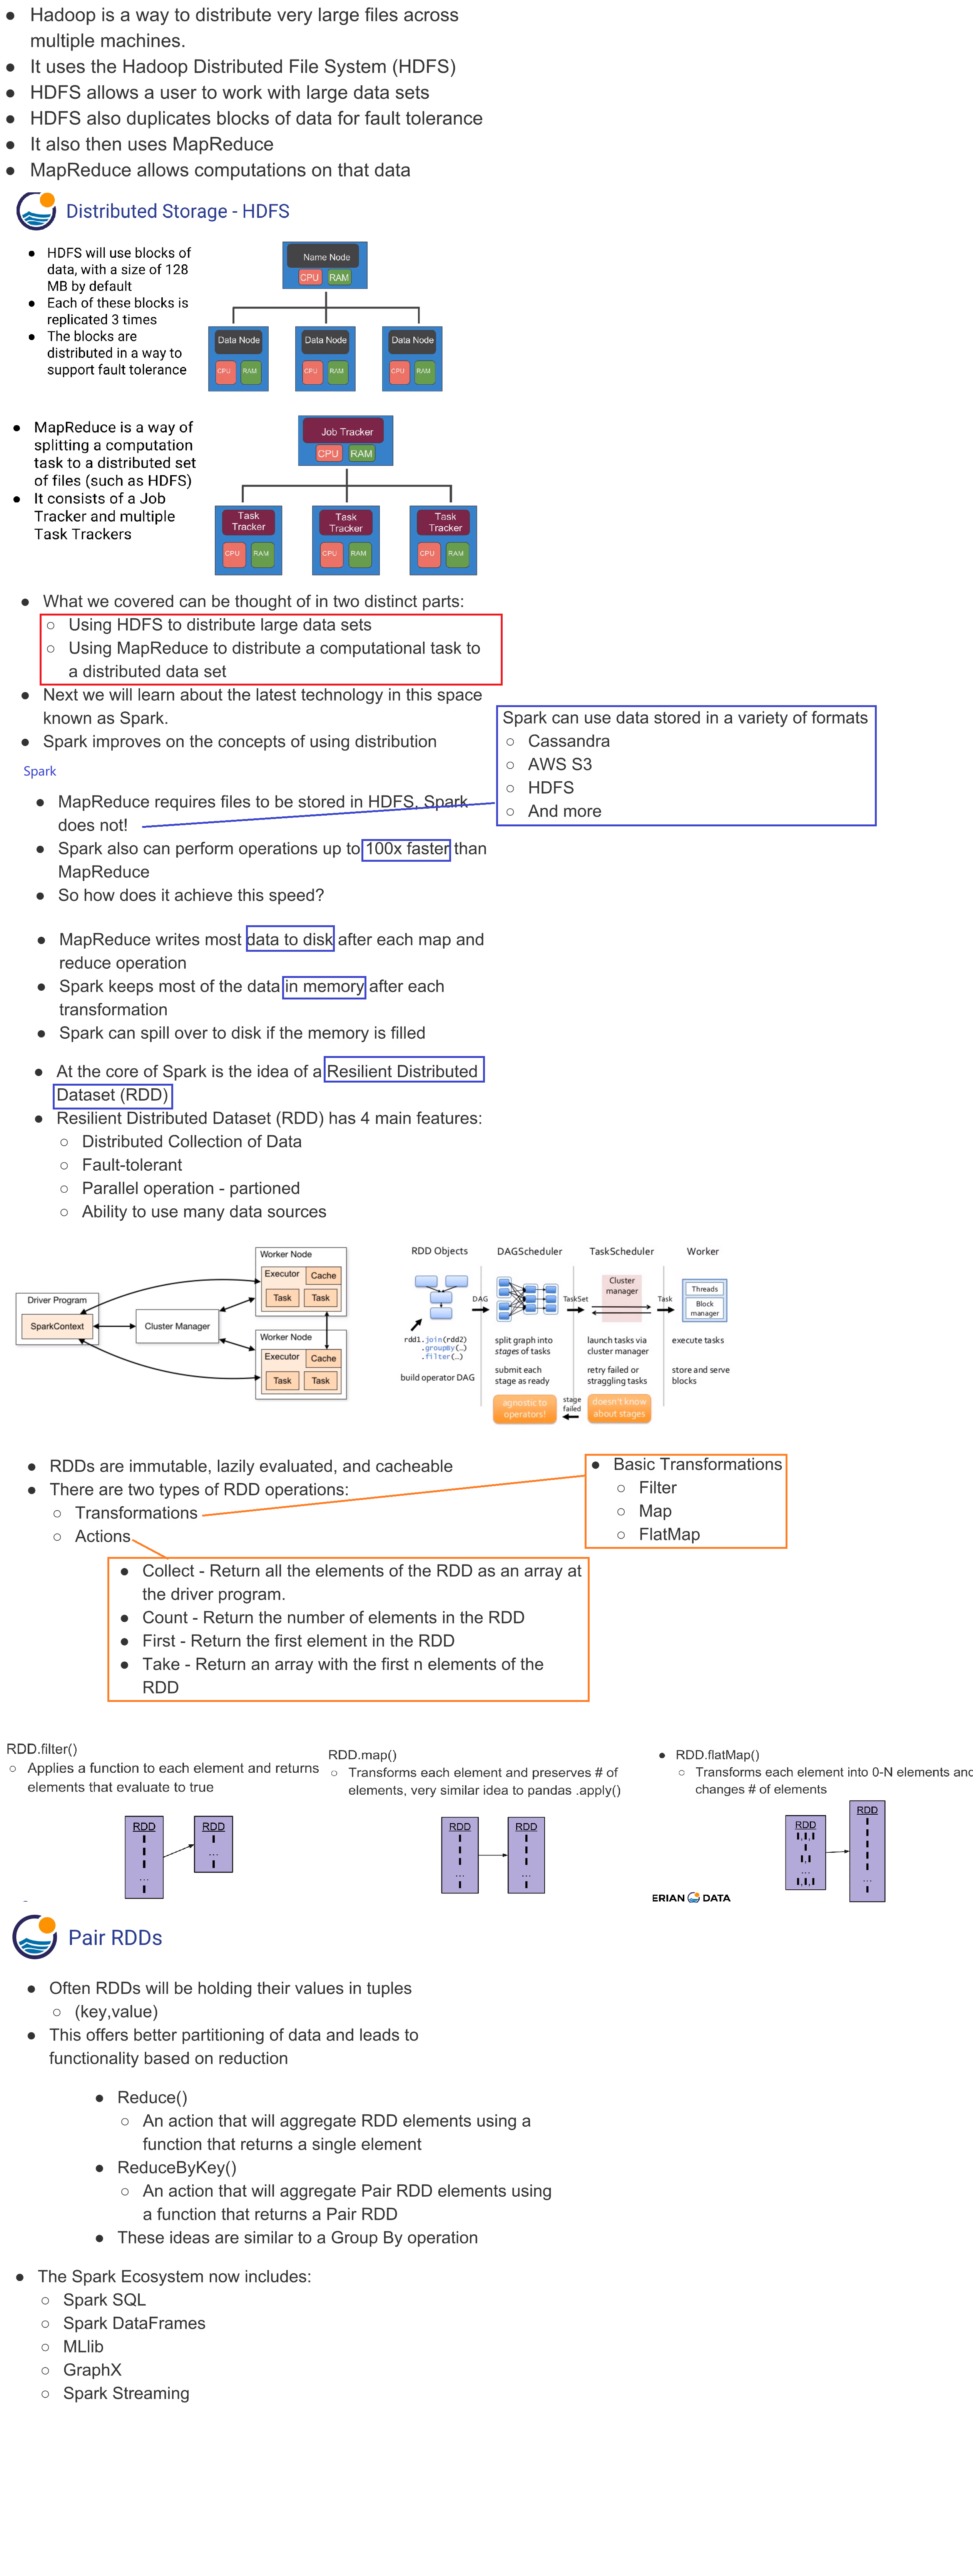

In [2]:
from IPython.display import Image
#This is not required for Choropleth map, but for insert image into this notebook.
Image(filename='Image/bigdata.png')

Sparks performance is up to 100 times faster in memory and 10 times faster on disk when compared to Hadoop.

### Steps on AWS Ubuntu:

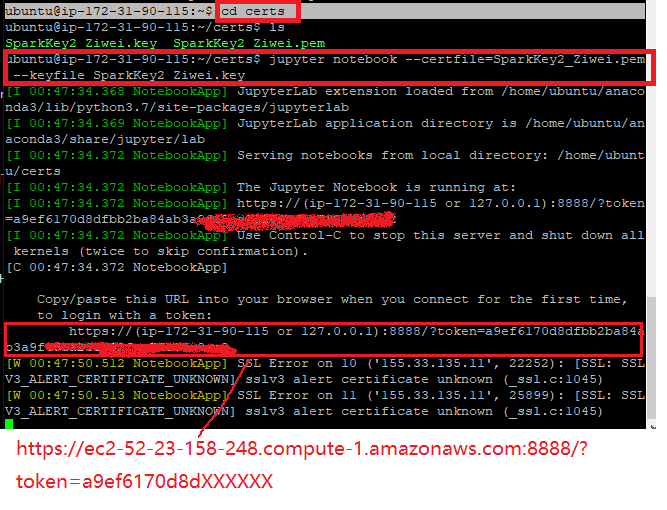

In [3]:
Image(filename='Image/conf_access.png')

- Paste 'https://Public DNS:port/?token=XXXX' into your browser.

### 0. Just fun before getting started:

* Judge if the even:

In [4]:
even = lambda s:s%2==0

In [5]:
even(3)

False

* Reverse the char:

In [6]:
rev = lambda str:str[::-1]

In [7]:
rev('dskafs')

'sfaksd'

* Retrive the 1st char:

In [8]:
first = lambda first: first[0]

In [9]:
first('test')

't'

* Add:

In [10]:
adderlam = lambda x,y:x+y

In [11]:
adderlam(3,5)

8

### 1. Preparation if install on Windows:
https://changhsinlee.com/install-pyspark-windows-jupyter/

### 2. Introduction to Spark and Python

__Ways to get PySpark available in a Jupyter Notebook:__

* Configure PySpark driver to use Jupyter Notebook: running pyspark will automatically open a Jupyter Notebook
* Load a regular Jupyter Notebook and load PySpark using findSpark package (to make a Spark Context available in your code.)

In [14]:
import findspark
findspark.init()

In [21]:
import pyspark # only run after findspark.init()
from pyspark import SparkContext

In [22]:
sc = SparkContext()

- Create a RDD in txt.

In [25]:
%%writefile SparkExample.txt
line 1 # Element 1
line 2 # Element 2
line 3 # Element 3
line 4 # Element 4

Overwriting SparkExample.txt


* __Import RDD into SparkContext by txt file:__

In [26]:
textFile = sc.textFile('SparkExample.txt') #textFile is RDD.

- The driver implicitly converts user code that contains transformations and actions into a logically directed acyclic graph called DAG.  
- Thus we need define transformations and actions:

In [27]:
# Actions example: 4 elements totally.
textFile.count()

4

In [28]:
textFile.first()

'line 1 # Element 1'

In [29]:
# Transformation example: filtering 
secfind = textFile.filter(lambda line: 'line 2' in line)

In [30]:
secfind

PythonRDD[6] at RDD at PythonRDD.scala:48

In [31]:
secfind.collect()

['line 2 # Element 2']

In [32]:
secfind.count()

1

### 3. RDD Transformation and Actions:

Term                   |Definition
----                   |-------
RDD                    |Resilient Distributed Dataset
Transformation         |Spark operation that produces an RDD
Action                 |Spark operation that produces a local object
Spark Job              |Sequence of transformations on data with a final action

#### Creating an RDD

There are two common ways to create an RDD:

Method                      |Result
----------                               |-------
`sc.parallelize(array)`                  |Create RDD of elements of array (or list)
`sc.textFile(path/to/file)`                      |Create RDD of lines from file

#### RDD Transformations

We can use transformations to create a set of instructions we want to preform on the RDD (before we call an action and actually execute them).

Transformation Example                          |Result
----------                               |-------
`filter(lambda x: x % 2 == 0)`           |Discard non-even elements
`map(lambda x: x * 2)`                   |Multiply each RDD element by `2`
`map(lambda x: x.split())`               |Split each string into words
`flatMap(lambda x: x.split())`           |Split each string into words and flatten sequence
`sample(withReplacement=True,0.25)`      |Create sample of 25% of elements with replacement
`union(rdd)`                             |Append `rdd` to existing RDD
`distinct()`                             |Remove duplicates in RDD
`sortBy(lambda x: x, ascending=False)`   |Sort elements in descending order

#### RDD Actions

Once you have your 'recipe' of transformations ready, what you will do next is execute them by calling an action. Here are some common actions:

Action                             |Result
----------                             |-------
`collect()`                            |Convert RDD to in-memory list 
`take(3)`                              |First 3 elements of RDD 
`top(3)`                               |Top 3 elements of RDD
`takeSample(withReplacement=True,3)`   |Create sample of 3 elements with replacement
`sum()`                                |Find element sum (assumes numeric elements)
`mean()`                               |Find element mean (assumes numeric elements)
`stdev()`                              |Find element deviation (assumes numeric elements)

### Example:

* Step 1: Create text for importing RDD:

In [34]:
%%writefile SparkExample.txt
first
second line
the third line
then a fourth line

Overwriting SparkExample.txt


In [35]:
# Don't have to run this bcz it got ran previously.
# from pyspark import SparkContext
# sc = SparkContext()

* Step 2: import RDD by txt

In [37]:
text_rdd = sc.textFile('SparkExample.txt')

* Step 3: Transformation on RDD:

In [39]:
words = text_rdd.map(lambda line: line.split())

In [40]:
words.collect()

[['first'],
 ['second', 'line'],
 ['the', 'third', 'line'],
 ['then', 'a', 'fourth', 'line']]

- Note: the words will not work until run the action call of words(collect()).

In [41]:
# Check the original RDD and compare:
text_rdd.collect()

['first', 'second line', 'the third line', 'then a fourth line']

In [42]:
text_rdd.flatMap(lambda line: line.split()).collect()

['first',
 'second',
 'line',
 'the',
 'third',
 'line',
 'then',
 'a',
 'fourth',
 'line']

#### RDDs and Key Value Pairs  

Now that we've worked with RDDs and how to aggregate values with them, we can begin to look into working with __Key Value Pairs__. In order to do this, let's create some fake data as a new text file.

This data represents some services sold to customers for some SAAS business.

In [66]:
%%writefile services.txt
#EventId    Timestamp    Customer   State    ServiceID    Amount
201       10/13/2017      100       NY       131          100.00
204       10/18/2017      700       TX       129          450.00
202       10/15/2017      203       CA       121          200.00
206       10/19/2017      202       CA       131          500.00
203       10/17/2017      101       NY       173          750.00
205       10/19/2017      202       TX       121          200.00

Overwriting services.txt


In [67]:
services = sc.textFile('services.txt')

- Take the top 3 lines, and split.

In [68]:
services.take(3)

['#EventId    Timestamp    Customer   State    ServiceID    Amount',
 '201       10/13/2017      100       NY       131          100.00',
 '204       10/18/2017      700       TX       129          450.00']

In [69]:
services.map(lambda line: line.split()).take(3)

[['#EventId', 'Timestamp', 'Customer', 'State', 'ServiceID', 'Amount'],
 ['201', '10/13/2017', '100', 'NY', '131', '100.00'],
 ['204', '10/18/2017', '700', 'TX', '129', '450.00']]

- Transformation: map to remove # of 1st line.

In [70]:
services.map(lambda line: line[1:] if line[0]=='#' else line).collect()

['EventId    Timestamp    Customer   State    ServiceID    Amount',
 '201       10/13/2017      100       NY       131          100.00',
 '204       10/18/2017      700       TX       129          450.00',
 '202       10/15/2017      203       CA       121          200.00',
 '206       10/19/2017      202       CA       131          500.00',
 '203       10/17/2017      101       NY       173          750.00',
 '205       10/19/2017      202       TX       121          200.00']

In [71]:
clean = services.map(lambda line: line[1:] if line[0]=='#' else line)

In [72]:
clean = clean.map(lambda line:line.split())

In [73]:
clean.collect()

[['EventId', 'Timestamp', 'Customer', 'State', 'ServiceID', 'Amount'],
 ['201', '10/13/2017', '100', 'NY', '131', '100.00'],
 ['204', '10/18/2017', '700', 'TX', '129', '450.00'],
 ['202', '10/15/2017', '203', 'CA', '121', '200.00'],
 ['206', '10/19/2017', '202', 'CA', '131', '500.00'],
 ['203', '10/17/2017', '101', 'NY', '173', '750.00'],
 ['205', '10/19/2017', '202', 'TX', '121', '200.00']]

- Grab the 'State' and 'Amount' tuple: (State, Amount)

In [80]:
step1 = clean.map(lambda lst: (lst[3], lst[-1]))

In [81]:
step1.collect()

[('State', 'Amount'),
 ('NY', '100.00'),
 ('TX', '450.00'),
 ('CA', '200.00'),
 ('CA', '500.00'),
 ('NY', '750.00'),
 ('TX', '200.00')]

- Want to sum the totally amount based on the same State:

In [84]:
step2 = step1.reduceByKey(lambda amt1,amt2 : amt1 + amt2)

In [85]:
step2.collect()

[('State', 'Amount'),
 ('NY', '100.00750.00'),
 ('TX', '450.00200.00'),
 ('CA', '200.00500.00')]

- This is just appending the string, not the sum result. Should be:

In [86]:
step3 = pairs.reduceByKey(lambda amt1, amt2: float(amt1)+float(amt2))

In [87]:
step3.collect()

[('State', 'Amount'), ('NY', 850.0), ('TX', 650.0), ('CA', 700.0)]

- Get rid of the title:

In [91]:
step4 = step3.filter(lambda x: x[0]!='State')

In [93]:
step4.collect()

[('NY', 850.0), ('TX', 650.0), ('CA', 700.0)]

In [94]:
step5 = step4.sortBy(lambda stAmount: stAmount[1], ascending=False)

In [95]:
step5.collect()

[('NY', 850.0), ('CA', 700.0), ('TX', 650.0)]

- OR: Transformation and final action once:

In [ ]:
step1 = clean.map(lambda lst: (lst[3], lst[-1]))
step3 = pairs.reduceByKey(lambda amt1, amt2: float(amt1)+float(amt2))
step4 = step3.filter(lambda x: x[0]!='State')
step5 = step4.sortBy(lambda stAmount: stAmount[1], ascending=False)

step5.collect()

#### Index added:

In [96]:
x = ['ID', 'State', 'Amount']

In [98]:
def func1(lst):
    return lst[-1]

In [99]:
def func2(id_st_amt):
    # Unpack values:
    (Id, st, amt)=id_st_amt
    return amt
#Same function with func1, but more readable.

In [100]:
func1(x)

'Amount'

In [101]:
func2(x)

'Amount'